In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
from IPython.display import HTML
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [4]:
style = '<style>svg{width:0.5% !important; height:0.5% !important;}</style>'


In [5]:
HTML(style)

In [6]:
train_titanic = pd.read_csv('train.csv')

In [7]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_titanic.isnull().sum() # Виводить суму всіх пропущених даних.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
x = train_titanic.drop(['Name','Cabin','PassengerId','Survived','Ticket'],axis = 1)

In [10]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
y = train_titanic[['Survived']]

In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
x = pd.get_dummies(x) # Розбиває номінативні зміні на a lot of групи.

In [14]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
x = x.fillna({'Age':x.Age.median()}) # Заповняє медіанну величину віку всіх пропусків.

In [16]:
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
graph = Source(tree.export_graphviz(clf, out_file=None
                                   , feature_names = list(x),class_names=['Died', 'Survied'],
                                   filled=True))

In [18]:
#display(SVG(graph.pipe(format='svg')))           # Тут дерево перевчилося .Тому що не має зазначиної глибини бля дерева.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [21]:
x_train.shape

(596, 10)

In [22]:
x_test.shape

(295, 10)

In [23]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
clf.score(x_train,y_train)

0.9798657718120806

In [25]:
clf.score(x_test,y_test)

0.752542372881356

In [26]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=3) # Зазначили глибину

In [27]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
clf.score(x_train,y_train)

0.8238255033557047

In [29]:
clf.score(x_test,y_test)

0.8203389830508474

In [30]:
score_data = pd.DataFrame()
max_score_values = range(1,100)

In [31]:
for max_score in max_score_values:
    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=max_score)
    clf.fit(x_train, y_train)
    
    value_train = clf.score(x_train,y_train)
    value_test = clf.score(x_test,y_test)
    
    mean_cross_val_score = cross_val_score(clf,x_train,y_train, cv=5 ).mean()
    
    temp_result = pd.DataFrame({'max_score':[max_score],
                           'train':[value_train],
                           'test':[value_test],
                           'corse_val':[mean_cross_val_score]})
    score_data = score_data.append(temp_result)

In [32]:
score_data.head()

,max_score,train,test,corse_val
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.805345


In [33]:
scores_data_long = pd.melt(score_data, id_vars = ['max_score'],value_vars = ['train','test','corse_val'],
                          var_name = 'setType',value_name='score')

In [34]:
scores_data_long.head()

,max_score,setType,score
0,1,train,0.781879
1,2,train,0.805369
2,3,train,0.823826
3,4,train,0.833893
4,5,train,0.840604


In [35]:
scores_data_long.query("setType == 'corse_val'").head(20)

,max_score,setType,score
198,1,corse_val,0.781857
199,2,corse_val,0.768553
200,3,corse_val,0.788678
201,4,corse_val,0.783580
202,5,corse_val,0.805345
203,6,corse_val,0.795388
204,7,corse_val,0.790261
205,8,corse_val,0.791885
206,9,corse_val,0.788509
207,10,corse_val,0.796941


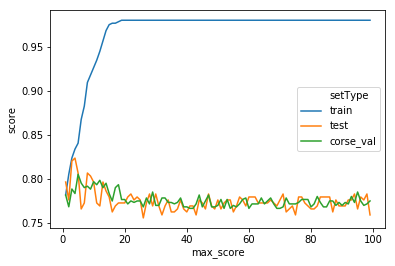

In [36]:
sb.lineplot(x='max_score',y='score',hue='setType',data=scores_data_long)

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

In [39]:
cross_val_score(clf,x_train,y_train, cv=5 )

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [40]:
cross_val_score(clf,x_train,y_train, cv=5 ).mean()

0.7835799743626264

In [41]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=10)

In [42]:
cross_val_score(best_clf,x_test,y_test, cv=5 ).mean()

0.7932203389830509

In [43]:
from sklearn.model_selection import GridSearchCV


In [44]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
parameters = {'criterion':['gini','entropy'],'max_depth' : range(1,30)}

In [46]:
grid_search = GridSearchCV(clf,parameters,cv=5)

In [47]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [48]:
grid_search.best_params_  # Це найкращі параметри для нашого дерева. на крос-валідації.

{'criterion': 'entropy', 'max_depth': 5}

In [49]:
best_result = grid_search.best_estimator_

In [50]:
best_result

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
best_result.score(x_test,y_test)

0.8067796610169492

In [52]:
from sklearn.metrics import precision_score,recall_score

In [53]:
y_pred = best_result.predict(x_test)

In [54]:
precision_score(y_test,y_pred)

0.7889908256880734

In [55]:
recall_score(y_test,y_pred)

0.7166666666666667

In [56]:
proba = best_result.predict_proba(x_test)

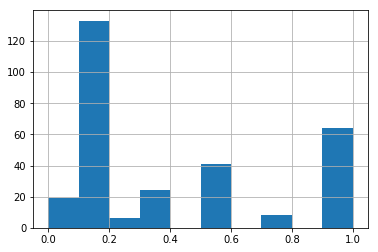

In [57]:
pd.Series(proba[:,1]).hist()

In [58]:
y_pred = np.where(proba[:,1] > 0.8,1,0)

In [59]:
recall_score(y_test,y_pred)

0.48333333333333334

In [60]:
precision_score(y_test,y_pred)

0.90625

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn 
import numpy as np
from sklearn.datasets import make_classification 

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, proba[:,1])

In [63]:
roc_auc = auc(fpr, tpr)

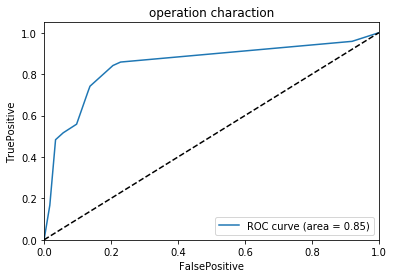

In [64]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FalsePositive')
plt.ylabel('TruePositive')
plt.title('operation charaction')
plt.legend(loc='lower right')

In [71]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,min_samples_split=100)

In [72]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

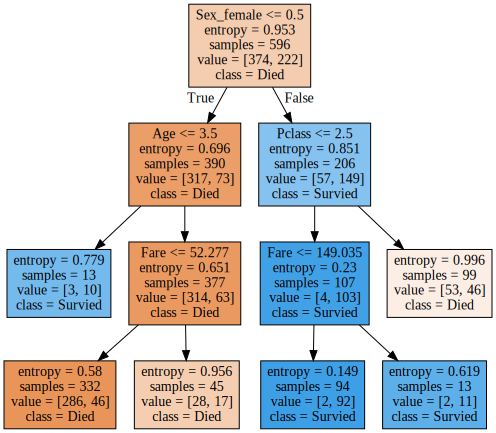

In [73]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(x),class_names=['Died','Survied'],filled=True))
display(SVG(graph.pipe(format='svg')))